<h1> Analysis of OKCupid'data & machine learning </h1>
<p>In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.</p>

<p>In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.</p>

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [3]:
#Create your df here:

df = pd.read_csv('profiles.csv')

print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [188]:
#print(df.job.value_counts())
#print(df.location.value_counts())
#print(df.income.value_counts())
#print(df.sex.value_counts())
#print(df.drinks.value_counts())
#print(df.body_type.value_counts())
#print(df.drugs.value_counts())
print(df.religion.value_counts())





agnosticism but not too serious about it      395
other and laughing about it                   378
agnosticism and laughing about it             375
atheism and laughing about it                 347
other                                         332
christianity but not too serious about it     322
other but not too serious about it            285
catholicism but not too serious about it      278
agnosticism                                   237
atheism but not too serious about it          221
atheism                                       196
other and somewhat serious about it           177
atheism and somewhat serious about it         163
christianity                                  159
christianity and somewhat serious about it    154
judaism but not too serious about it          151
other and very serious about it               124
catholicism and laughing about it             116
atheism and very serious about it             112
agnosticism and somewhat serious about it      99


In [6]:
print(len(df.age.value_counts()))
print(df.age.value_counts())

54
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64


<h2>Visualize some of the Data</h2>

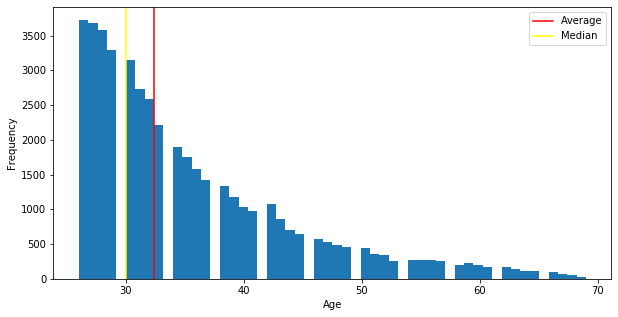

In [82]:
plt.figure(figsize = (10,5))
plt.hist(df.age,bins= 54,range=(26,69))
plt.xlabel('Age')
plt.ylabel("Frequency")
avg_age = df.age.mean()
median_age = df.age.median()


plt.axvline(x= avg_age,color= 'red')
plt.axvline(x = median_age, color = 'yellow')
plt.legend(['Average','Median'])

plt.show()

In [4]:
#Make the box plot income by age
import seaborn as sns
#refine age column for X axis
def genelation_selector(i):

    if i >= 20 and i < 30:
        return 20
    elif i >= 30 and i < 40:
        return 30
    elif i >= 40 and i < 50:
        return 40
    elif i >= 50 and i < 60:
        return 50
    elif i >=60 and i < 70:
        return 60
        
        
            
df['generation'] = df.age.apply(genelation_selector)
income_above0 = df[df['income'] > 0 ]
print(income_above0.income.value_counts())


20000      2952
100000     1621
80000      1111
30000      1048
40000      1005
50000       975
60000       736
70000       707
150000      631
1000000     521
250000      149
500000       48
Name: income, dtype: int64


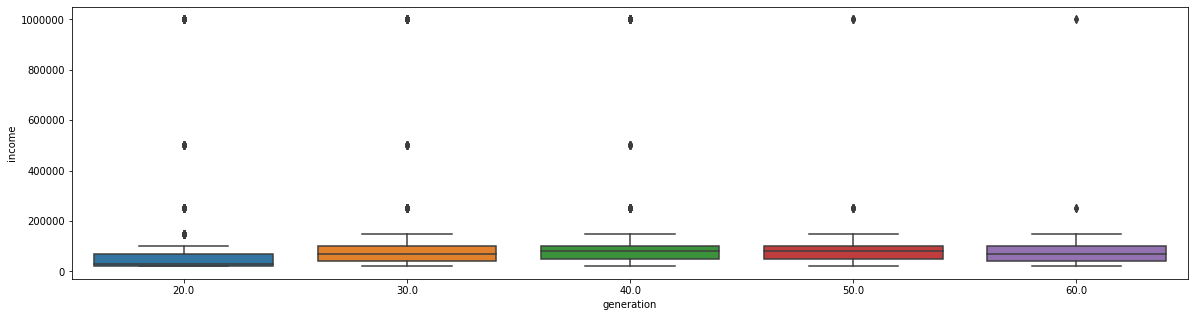

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df['generation'],y=income_above0['income'])

plt.show()



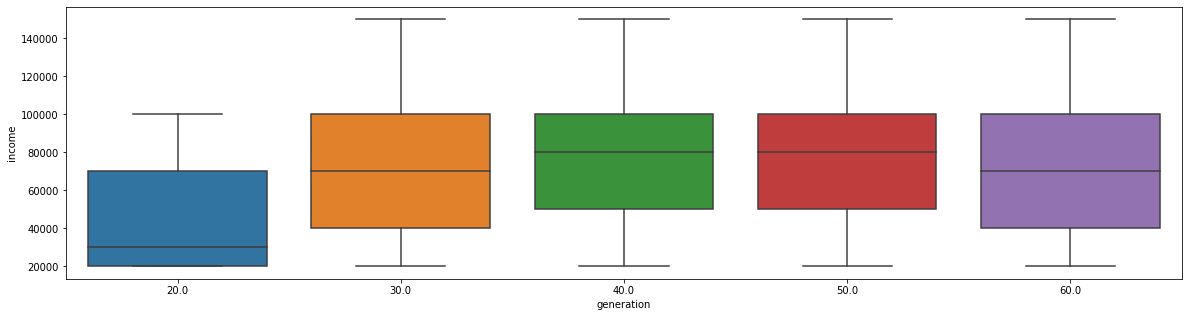

In [21]:
#remove outliers to get to know distoribution 
plt.figure(figsize=(20,5))
sns.boxplot(x = df['generation'],y=income_above0['income'],showfliers=False)

plt.show()




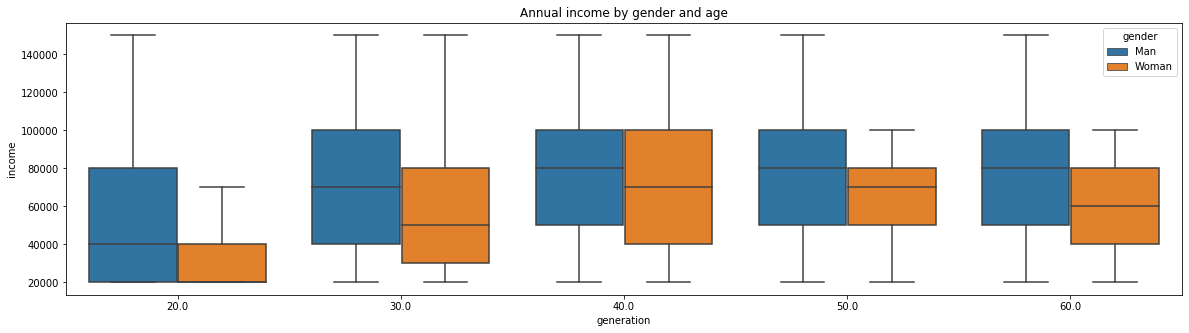

In [30]:
#add gender
plt.figure(figsize=(20,5))
df['gender'] = df.sex.map({'m':'Man','f':'Woman'})
sns.boxplot(data =df, x ='generation',y=income_above0['income'],showfliers=False,hue='gender').set_title('Annual income by gender and age')

plt.show()



<h2>Formulate a Question</h2>
<p>As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:</p>
<p>We started to wonder if there was a way to predict a user’s Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.</p>

In [189]:
#df.sign.value_counts()

<h2>Augment your Data</h2>

<p>In order to answer the question you’ve formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. diet consists of the options vegan, vegetarian, anything, etc. instead of numerical values).

Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.</p>

<p>For our question about Zodiac signs, we wanted to transform the drinks column into numerical data. We used:</p>

In [5]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}

drugs_mapping = {'never': 0,'sometimes': 1,'often': 2}

smokes_mapping = {'no': 0,'sometimes': 1,'when drinking': 2,'yes': 3,'trying to quit': 4}

sex_mapping = {'m': 0,'f': 1}

body_type_mapping = {'average': 0,'fit': 1,'athletic': 2,'thin': 3,'curvy': 4,'a little extra': 5,'skinny': 6,'full figured': 7,'overweight':8,\
                    'jacked': 9,'used up': 10,'rather not say': 11}

'''
0: high school
1: 2-year college
2: undergrad
3: masters
4: phd
5: med school
6: law school
everything else NaN
'''
education_mapping = {'graduated from college/university': 2,'graduated from masters program': 3,'working on college/university': np.nan,\
               'working on masters program': np.nan,'graduated from two-year college': 1,'graduated from high school': 0,\
               'graduated from ph.d program': 4,'graduated from law school': 6,'working on two-year college': np.nan,'dropped out of college/university': np.nan,\
               'working on ph.d program': np.nan,'college/university': 2,'graduated from space camp': np.nan,'dropped out of space camp': np.nan,\
               'graduated from med school': 5,'working on space camp': np.nan,'working on law school': 6,'two-year college': 1,\
               'working on med school': np.nan,'dropped out of two-year college': np.nan,'dropped out of masters program': np.nan,\
               'masters program': 3,'dropped out of ph.d program': np.nan,'dropped out of high school': np.nan,'high school': 0,\
               'working on high school': np.nan,'space camp': np.nan,'ph.d program': 4,'law school': 6,'dropped out of law school': np.nan,\
               'dropped out of med school': np.nan,'med school': 5}

'''
0: anything        
1: vegetarian      
2: vegan            
3: halal
4: kosher
5: other
'''

diet_mapping = {'mostly anything': 0,'strictly anything': 0,'anything': 0,'mostly vegetarian': 1,'mostly other': 5,'strictly vegetarian': 1,'vegetarian': 1, 
                'strictly other': 5,'mostly vegan': 2,'other': 5,'strictly vegan': 2,'vegan': 2,'mostly kosher': 4,'mostly halal': 3,'strictly kosher': 4,
                'halal': 3,'strictly halal': 3,'kosher':4}


'''                             
0: artistic / musical / writer          
1: computer / hardware / software                               
2: science / tech / engineering      
3: sales / marketing / biz dev        
4: education / academia         
5: medicine / health                 
6: entertainment / media                   
7: executive / management                
8: banking / financial / real estate                 
9: hospitality / travel   
10: law / legal services                 
11: construction / craftsmanship                 
12: clerical / administrative           
13: political / government           
14: transportation                                      
15: military
16: student 
17: unemployed 
18: retired                            
19: other   
nan: rather not say  
'''

job_mapping = {'artistic / musical / writer': 0,'computer / hardware / software': 1,'science / tech / engineering': 2,'sales / marketing / biz dev': 3,
               'education / academia': 4,'medicine / health': 5,'entertainment / media': 6,'executive / management': 7,'banking / financial / real estate': 8,
               'hospitality / travel': 9,'law / legal services': 10,'construction / craftsmanship': 11,'clerical / administrative': 12,'political / government': 13,
               'transportation': 14,'military': 15,'student': 16,'unemployed': 17,'retired': 18,'other': 19,'rather not say': np.nan}


'''
0: leo                                             
1: libra                                            
2: cancer                                           
3: virgo                                            
4: scorpio                                         
5: gemini                                          
6: taurus                                           
7: aries                                           
8: pisces                                           
9: aquarius                                          
10: sagittarius                                      
11: capricorn   
It doesn't take into account whether you believe it or not.
'''


def signfinder(x) : 
    leo = 'leo' in x
    libra = 'libra' in x
    cancer = 'cancer' in x
    virgo = 'virgo' in x
    scorpio = 'scorpio' in x
    gemini = 'gemini' in x
    taurus = 'taurus' in x
    aries = 'aries' in x
    pisces = 'pisces' in x
    aquarius = 'aquarius' in x
    sagittarius = 'sagittarius' in x
    capricorn ='capricorn' in x
    if leo == True:
        return 0
    elif libra == True:
        return 1
    elif cancer == True:
        return 2
    elif virgo == True:
        return 3
    elif scorpio == True:
        return 4
    elif  gemini == True:
        return 5
    elif taurus == True:
        return 6
    elif aries == True:
        return 7
    elif pisces == True:
        return 8
    elif aquarius == True:
        return 9
    elif  sagittarius == True:
        return 10
    elif capricorn == True:
        return 11
'''    
0:agnosticism 
1:atheism                                       
2:christianity 
3:catholicism 
4:judaism 
5:buddhism
6:hinduism 
7:islam 
8:other  
It doesn't take into account whether you believe it or not.
'''

def religionfinder(x):
    agnosticism = 'agnosticism' in x
    atheism = 'atheism' in x
    christianity = 'christianity' in x
    catholicism = 'catholicism' in x
    judaism = 'judaism' in x
    buddhism = 'buddhism' in x
    islam = 'islam' in x
    other = 'other' in x
    if agnosticism == True:
        return 0
    elif agnosticism == True:
        return 1
    elif atheism == True:
        return 2
    elif christianity == True:
        return 3
    elif catholicism == True:
        return 4
    elif judaism == True:
        return 5
    elif buddhism == True:
        return 6
    elif islam == True:
        return 7
    elif other == True:
        return 8
     
    
    
    
    
    
    


    
    
    
    


# make columns which have numeric values
df["drinks_code"] = df.drinks.map(drink_mapping)
df['drugs_code'] = df.drugs.map(drugs_mapping)
df['smokes_code'] = df.smokes.map(smokes_mapping)
df['sex_code'] = df.sex.map(sex_mapping)
df['body_type_code'] = df.body_type.map(body_type_mapping)
df['education_code'] = df.education.map(education_mapping)
df['diet_code'] = df.diet.map(diet_mapping)
df['job_code'] = df.job.map(job_mapping)
df['sign_code'] = df.sign.apply(lambda x: signfinder(str(x)))
df['riligion_code'] = df.religion.apply(lambda x:religionfinder(str(x)))


#delete -1 value in an income column
df['income_notnull'] = df.income.apply(lambda x: np.nan if (x == -1) else x)


<p>We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the NaNs, and then created a new column called essay_len:</p>
<p>We also created a column with average word length and a column with the frequency of the words “I” or “me” appearing in the essays.</p>

In [76]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
df['all_essays'] = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = all_essays.apply(lambda x: len(x))
#print(df.essay_len.head())
#split strings for counting number of words
all_essays = all_essays.str.split()

def word_counter(essays):
    num_letter = 0
    num_words = 0
    if len(essays) == 0:
        return 0
    else:
        for i in essays:
            num_letter += len(i)
            num_words += 1
        return num_letter / num_words
    
df['average_word_length'] = all_essays.apply(lambda x: word_counter(x))
#print(df['average_word_length'].head())

df['freq_i_me'] = df.all_essays.str.count('\s[iI]\s|\s[mM]e\s')
# Since 'freq_i_me' columns has a lot of nan values, I will change Nan to 0
df = df.fillna({'freq_i_me':0})

print(df.freq_i_me.head())

0    18
1    20
2    23
3     1
4     2
Name: freq_i_me, dtype: int64


<h2>Normalize your Data</h2>

In [7]:
sample = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'average_word_length','sign_code']]
sample = sample.dropna()
feature_data =sample[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'average_word_length']]
labels = sample[['sign_code']]
x = feature_data.values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(len(feature_data))
print(len(labels))


35570
35570


<h2> User's Zodiac Predictions </h2>

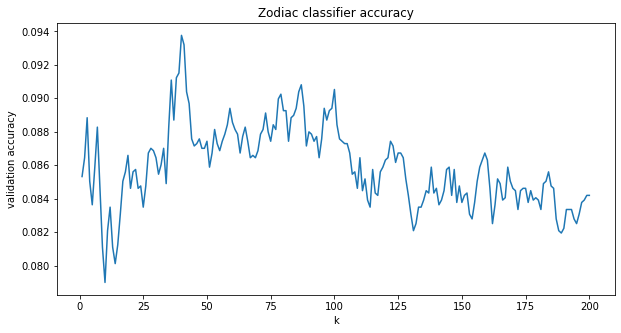

In [8]:
# split data for the prediction 
train_data,test_data,train_labels,test_labels = train_test_split(x_scaled,labels,test_size = 0.2, random_state = 100)
accuracies =[]
for k in range(1,201):
      classifier = KNeighborsClassifier(n_neighbors=k)
      classifier.fit(train_data,np.ravel(train_labels))
      accuracies.append(classifier.score(test_data,test_labels))

k_list = range(1,201)
plt.figure(figsize = (10,5))
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('validation accuracy')
plt.title('Zodiac classifier accuracy')
plt.show()



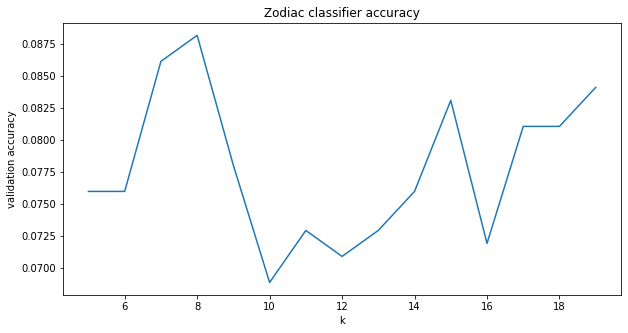

In [94]:
accuracies =[]
for k in range(5,20):
      classifier = KNeighborsClassifier(n_neighbors=k)
      classifier.fit(train_data,np.ravel(train_labels))
      accuracies.append(classifier.score(test_data,test_labels))

k_list = range(5,20)
plt.figure(figsize = (10,5))
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('validation accuracy')
plt.title('Zodiac classifier accuracy')
plt.show()



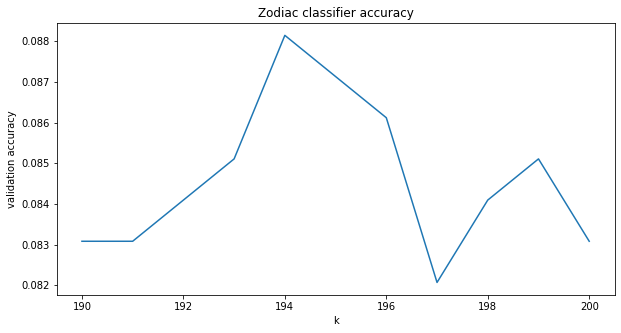

In [95]:
accuracies =[]
for k in range(190,201):
      classifier = KNeighborsClassifier(n_neighbors=k)
      classifier.fit(train_data,np.ravel(train_labels))
      accuracies.append(classifier.score(test_data,test_labels))

k_list = range(190,201)
plt.figure(figsize = (10,5))
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('validation accuracy')
plt.title('Zodiac classifier accuracy')
plt.show()

# Best K value is 194 

In [103]:
# Train data by KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=194)
classifier.fit(train_data,np.ravel(train_labels))
print(classifier.score(test_data,test_labels))
# ad example data and predict their zodiac sign
users = [[0,3,0,5000,4.5],[1,2,1,4900,4.4],[2,0,2,4800,4.3]]
scaler = StandardScaler()
users = scaler.fit_transform(users)

print(classifier.predict(users))




0.08814589665653495
[5. 1. 1.]


<h2>Can we predict sex with education level and income??</h2>

0.7270114942528736


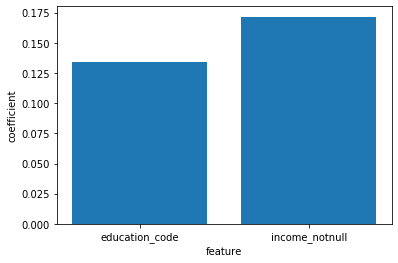

In [119]:
sample = df[['sex_code','education_code','income_notnull']]
sample = sample.dropna()
features = sample[['education_code','income_notnull']] 
x = features.values
scaler = StandardScaler()
features  = scaler.fit_transform(x)
labels = sample['sex_code']

#train and test
x_train,x_test,y_train,y_test = train_test_split(features,labels)
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
print(classifier.score(x_test,y_test))
# the score is 75% which is not good 

#let's see which feature is more important than others
coefficients = abs(classifier.coef_)
coefficients = coefficients.tolist()[0]

plt.bar([1,2],coefficients)
plt.xticks([1,2],['education_code','income_notnull'])
plt.xlabel('feature')
plt.ylabel('coefficient')

plt.show()





0.8524904214559387


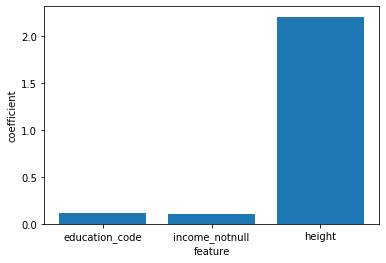

In [121]:
# let's add height into features
sample = df[['sex_code','education_code','income_notnull','height']]
sample = sample.dropna()
features = sample[['education_code','income_notnull','height']] 
x = features.values
scaler = StandardScaler()
features  = scaler.fit_transform(x)
labels = sample['sex_code']

x_train,x_test,y_train,y_test = train_test_split(features,labels)
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
print(classifier.score(x_test,y_test))
# After additing height column, the score got increased

#let's see which feature is more important than others
coefficients = abs(classifier.coef_)
coefficients = coefficients.tolist()[0]

plt.bar([1,2,3],coefficients)
plt.xticks([1,2,3],['education_code','income_notnull','height'])
plt.xlabel('feature')
plt.ylabel('coefficient')

plt.show()

# height solumns has significant to make a decision 




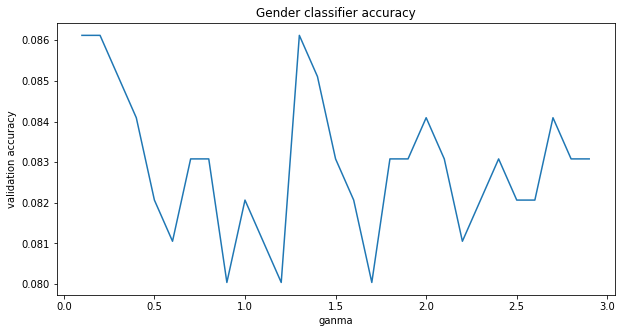

In [137]:
#Let's take a look another ML method.
sample = df[['sex_code','education_code','income_notnull']]
sample = sample.dropna()
features = sample[['education_code','income_notnull']] 
x = features.values
scaler = StandardScaler()
features  = scaler.fit_transform(x)
labels = sample['sex_code']


#train and test
x_train,x_test,y_train,y_test = train_test_split(features,labels)
gamma_train = np.arange(0.1,3.0,0.1)
accuracies = []
for i in gamma_train:
    classifier = SVC(kernel = 'rbf',gamma = i)
    classifier.fit(train_data,np.ravel(train_labels))
    accuracies.append(classifier.score(test_data,test_labels))


gamma_list = gamma_train
plt.figure(figsize = (10,5))
plt.plot(gamma_list,accuracies)
plt.xlabel('ganma')
plt.ylabel('validation accuracy')
plt.title('Gender classifier accuracy')
plt.show()





In [135]:
classifier = SVC(kernel = 'rbf',gamma = 22)
classifier.fit(train_data,np.ravel(train_labels))
print(classifier.score(test_data,test_labels))

0.08814589665653495


In [145]:
classifier2 = SVC(kernel = 'rbf',gamma = 1.3)
classifier2.fit(train_data,np.ravel(train_labels))
print(classifier2.score(test_data,test_labels))

0.08611955420466058


In [148]:
# so far the score that has 88% sccuracy is the best 

<h2>Can we predict frequency of smoking cigarete with education level, drinks, drugs, body_type, job, and riligion  </h2>

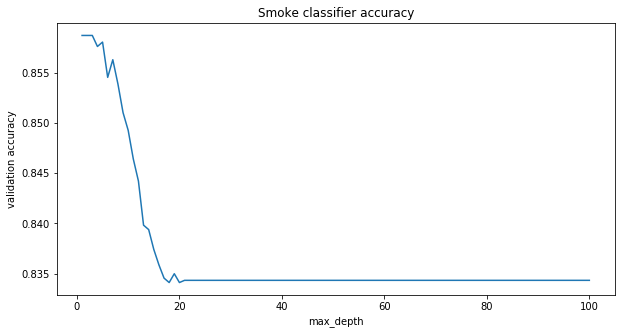

[0.15904933 0.32270278 0.20106097 0.22182161 0.09536532]


In [22]:
sample = df[['drugs_code','job_code','body_type_code','riligion_code','education_code','smokes_code']]
sample = sample.dropna()
data = sample[['drugs_code','job_code','body_type_code','riligion_code','education_code']]
labels = sample['smokes_code']

train_data,test_data,train_labels,test_labels =train_test_split(data,labels,random_state=1)
#Let's see which max_depth rate has a best score
scores = []
for i in range(1,101):
      tree =DecisionTreeClassifier(random_state =1,max_depth=i)
      tree.fit(train_data,train_labels)

      scores.append(tree.score(test_data,test_labels))
plt.figure(figsize=(10,5))
plt.plot(range(1,101),scores)
plt.xlabel('max_depth')
plt.ylabel('validation accuracy')
plt.title('Smoke classifier accuracy')
plt.show()

print(tree.feature_importances_)

In [23]:
tree1 =DecisionTreeClassifier(random_state =1,max_depth=3)
tree1.fit(train_data,train_labels)
print(tree1.score(test_data,test_labels))

0.8587458745874588


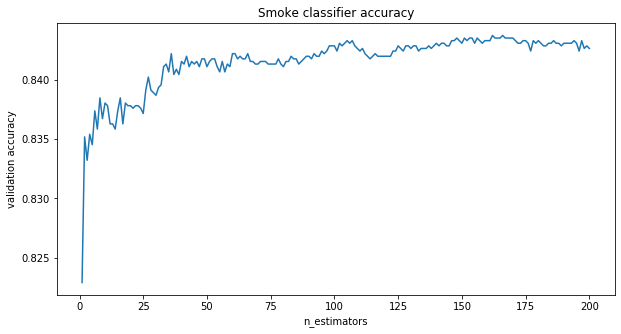

[0.12961538 0.32376361 0.23230848 0.21163569 0.10267683]


In [24]:
# How about using Random forest
scores = []
for i in range(1,201):
    forest = RandomForestClassifier(random_state = 1, n_estimators=i)
    forest.fit(train_data,train_labels)
    scores.append(forest.score(test_data,test_labels))
plt.figure(figsize=(10,5))
plt.plot(range(1,201),scores)
plt.xlabel('n_estimators')
plt.ylabel('validation accuracy')
plt.title('Smoke classifier accuracy')
plt.show()

print(forest.feature_importances_)

In [21]:
forest = RandomForestClassifier(random_state = 1, n_estimators=162)
forest.fit(train_data,train_labels)
print(forest.score(test_data,test_labels))

0.8437843784378438


<h2>Predict income with length of essays and average word length?</h2>

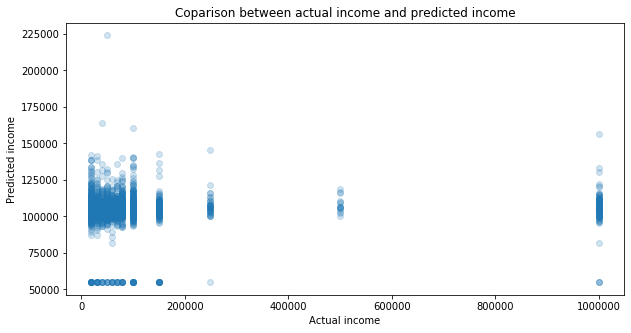

Train score:  0.003782935123149978
Test score:  -0.00016526577596498448
[(array([-0.79399111,  0.19939277]), 12812.381502081418), (array([-0.37102845, -0.17344781]), -3013.8814869254397)]


In [63]:
# Prepare data for loading training set
sample = df[['essay_len','average_word_length','income_notnull']]
sample = sample.dropna()
X = sample[['essay_len','average_word_length']]
y = sample['income_notnull']
scaler = StandardScaler() 
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =1)

if len(X_train.shape) < 2:
    X_train = np.array(X_train).reshpae(-1,1)
    X_test = np.array(X_test).reshape(-1,1)

#load data into a linear_model
ml = LinearRegression()
ml.fit(X_train_scaled,y_train)
y_predicted = ml.predict(X_test_scaled)

# plot data
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_predicted,alpha = 0.2)
plt.xlabel('Actual income')
plt.ylabel('Predicted income')
plt.title('Coparison between actual income and predicted income')


plt.show()

print('Train score: ',ml.score(X_train_scaled,y_train))
print('Test score: ',ml.score(X_test_scaled,y_test))
print(sorted(list(zip(X,ml.coef_)),key = lambda x: abs(x[1]),reverse=True))
# As you can see, this model's accuracy is very low. I need to train data by a defferent model

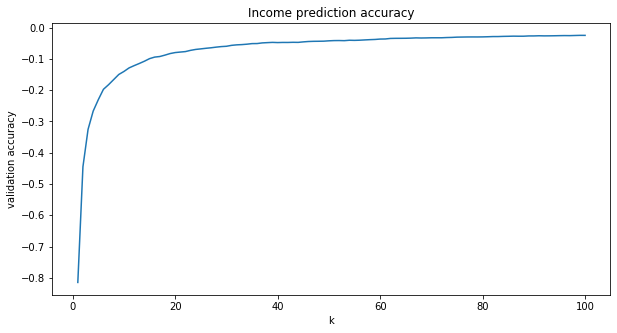

Test score:  -0.02483659461788501


In [61]:
# Use K-NEAREST NEIGHBOR REGRESSOR. Try to find best k value
accuracies =[]
for k in range(1,101):
    model = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    model.fit(X_train_scaled,y_train)
    accuracies.append(model.score(X_test_scaled,y_test))
k_list = range(1,101)

plt.figure(figsize = (10,5))
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('validation accuracy')
plt.title('Income prediction accuracy')
plt.show()

print('Score: ',model.score(X_test_scaled,y_test))

#I can't say either model is valid.

<h2>Predict age with the frequency of "I" or "me" in essays?</h2>

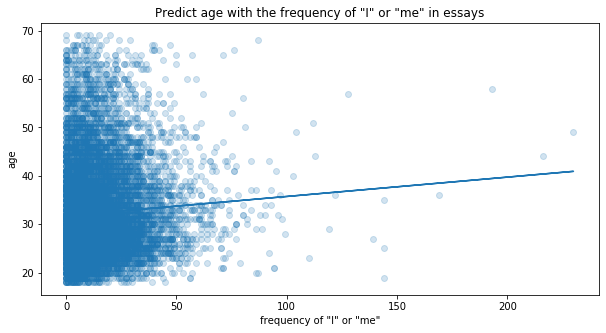

Score:  0.0036377087137188235
[(array([18]), 0.039902301186851945)]


In [83]:
# Use linear_model
# # Prepare data for loading training set
sample = df[['age','freq_i_me']]
sample = sample.dropna()
X = np.array(sample['freq_i_me']).reshape(-1,1)
y = sample['age']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =1)


#load data into a linear_model
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

#Make prot
plt.figure(figsize=(10,5))
plt.scatter(X_test,y_test,alpha= 0.2)
plt.plot(X_test,y_predict)
plt.xlabel('frequency of "I" or "me"')
plt.ylabel('age')
plt.title('Predict age with the frequency of "I" or "me" in essays')
plt.show()

print('Score: ',model.score(X_test,y_test))
print(sorted(list(zip(X,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
#The accuracy score is so low that I can't say that this model is valid.